<a href="https://colab.research.google.com/github/surupi/MachineLearning-IEM2ndYear/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/") 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV- kMeans index.csv')
df.head()

#from sklearn.preprocesing import LabelEncoder
#lblEncoder=Labelencoder()
#normalized_df=df.apply(lblEncoder.fit_transform)

selected_cols=["Age (years)","Credit Amount","Duration of Credit (month)"]
cluster_data=df.loc[:,selected_cols]

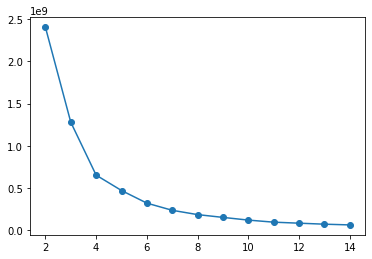

In [ ]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias=[]

for c in clusters_range:
  kmeans=KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0).fit(df)
  inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.show()

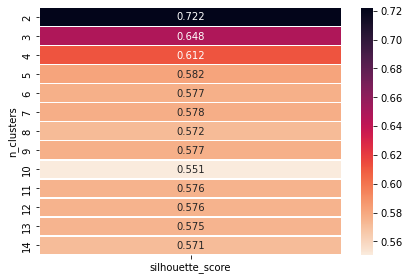

In [ ]:
clusters_range=range(2,15)
results=[]
for c in clusters_range:
  clusterer=KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
  cluster_labels=clusterer.fit_predict(df)
  silhouette_avg=silhouette_score(df, cluster_labels)
  results.append([c, silhouette_avg])

result=pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
kmeans_sel=KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0).fit(df)
labels=pd.DataFrame(kmeans_sel.labels_)
clustered_data=cluster_data.assign(Cluster=labels)
#scatters(clustered_data, h='Cluster')

In [ ]:
grouped_km=clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age (years),Credit Amount,Duration of Credit (month)
Cluster,,,
0,35.0,755.4,11.8
1,37.7,7573.8,34.7
2,35.2,3660.1,23.3
3,35.6,12215.7,34.9
4,34.6,2088.4,18.4
5,35.2,5420.2,28.5
6,41.5,14838.4,42.8
7,36.8,1361.5,14.1
8,34.5,8942.0,36.0
